In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score

In [3]:
cons_fairfax = pd.read_csv("../../../census_data/Processed/US/CBG/cons_us_cbg.csv")
synth_pop_fairfaxIPF = pd.read_csv("../../../synthetic_data/US/CBG/synthetic_group_data_IPF.csv")
synth_pop_fairfaxHC = pd.read_csv("../../../synthetic_data/US/CBG/synthetic_group_data_HC.csv")
synth_pop_fairfaxCP = pd.read_csv("../../../synthetic_data/US/CBG/synthetic_group_data_CP.csv")
synth_pop_fairfaxSA = pd.read_csv("../../../synthetic_data/US/CBG/synthetic_group_data_SA.csv")
synth_pop_fairfaxRPWR = pd.read_csv("../../../synthetic_data/US/CBG/synthetic_group_data_RPWR.csv")
print(synth_pop_fairfaxRPWR.columns)

Index(['population', '0_9', '10_19', '20_29', '30_39', '40_49', '50_59',
       '60_69', '70_79', '80_89', 'm', 'f', 'white', 'black.aa',
       'a.ind..nat.ak', 'asian', 'nat.hi.pt.isl', 'other', 'two.',
       'not.hisp.latino', 'hisp.latino'],
      dtype='object')


In [4]:
complete_resultIPF = []
complete_resultHC = []
complete_resultSA = []
complete_resultCP = []
complete_resultRPWR = []

for name in synth_pop_fairfaxIPF.columns:
    synth = synth_pop_fairfaxIPF[name].to_numpy()
    real = cons_fairfax[name].to_numpy()
    r2 = r2_score(real,synth)
    if r2 > 1: r2 = 1
    if r2 < 0: r2 = 0
    complete_resultIPF.append(r2)
    
for name in synth_pop_fairfaxHC.columns:
    synth = synth_pop_fairfaxHC[name].to_numpy()
    real = cons_fairfax[name].to_numpy()
    r2 = r2_score(real,synth)
    if r2 > 1: r2 = 1
    if r2 < 0: r2 = 0
    complete_resultHC.append(r2)
    
for name in synth_pop_fairfaxSA.columns:
    synth = synth_pop_fairfaxSA[name].to_numpy()
    real = cons_fairfax[name].to_numpy()
    r2 = r2_score(real,synth)
    if r2 > 1: r2 = 1
    if r2 < 0: r2 = 0
    complete_resultSA.append(r2)
    
for name in synth_pop_fairfaxRPWR.columns:
    synth = synth_pop_fairfaxRPWR[name].to_numpy()
    real = cons_fairfax[name].to_numpy()
    r2 = r2_score(real,synth)
    if r2 > 1: r2 = 1
    if r2 < 0: r2 = 0
    complete_resultRPWR.append(r2)
    
for name in synth_pop_fairfaxCP.columns:
    synth = synth_pop_fairfaxCP[name].to_numpy()
    real = cons_fairfax[name].to_numpy()
    r2 = r2_score(real,synth)
    if r2 > 1: r2 = 1
    if r2 < 0: r2 = 0
    complete_resultCP.append(r2)

complete_result = []; complete_result.append(complete_resultIPF); complete_result.append(complete_resultHC)
complete_result.append(complete_resultCP); complete_result.append(complete_resultSA); complete_result.append(complete_resultRPWR)

In [5]:
result_df = pd.DataFrame(complete_result,index=['IPF','HC','CP','SA','RPWR'],columns=synth_pop_fairfaxIPF.columns)
result_df

,population,0_9,10_19,20_29,30_39,40_49,50_59,60_69,70_79,80_89,...,f,white,black.aa,a.ind..nat.ak,asian,nat.hi.pt.isl,other,two.,not.hisp.latino,hisp.latino
IPF,1.0,0.991320,0.992478,0.993642,0.991234,0.987694,0.987018,0.985929,0.982266,0.980265,...,0.997206,0.996020,0.996596,0.980717,0.991676,0.969110,0.976246,0.985516,0.997733,0.992177
HC,1.0,0.578111,0.491279,0.350103,0.468539,0.600897,0.477614,0.195749,0.049320,0.103095,...,1.000000,0.961126,0.888820,0.252523,0.965346,0.213765,0.675888,0.903821,0.949375,0.825334
CP,1.0,0.991077,0.992001,0.995022,0.993281,0.987569,0.989864,0.987199,0.981832,0.993415,...,0.997376,0.998492,0.996951,0.972641,0.997110,0.987183,0.997183,0.988167,0.999610,0.998655
SA,1.0,0.574017,0.494352,0.365094,0.460023,0.599532,0.477723,0.200817,0.041034,0.118989,...,1.000000,0.951955,0.808025,0.145417,0.937873,0.208510,0.715154,0.849431,0.955192,0.845403
RPWR,1.0,0.441816,0.495625,0.373479,0.366271,0.514170,0.450885,0.000000,0.000000,0.000000,...,0.953610,0.418592,0.028655,0.000000,0.000000,0.000000,0.000000,0.110329,0.691309,0.000000


<AxesSubplot:title={'center':'Fairfax CBG R-squared Values'}>

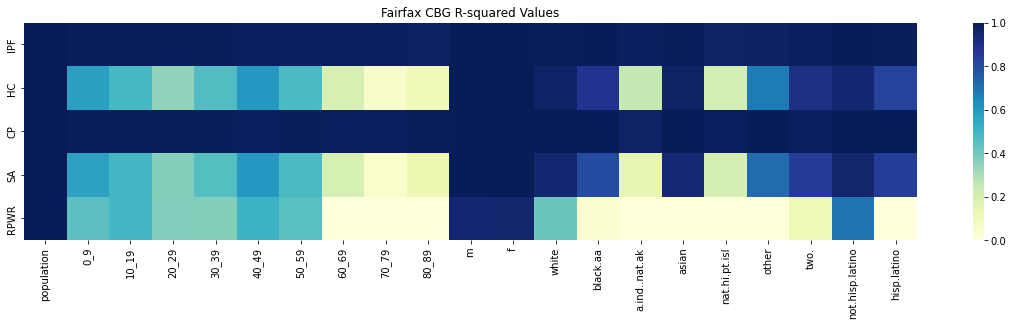

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize=(20,4))
plt.title("Fairfax CBG R-squared Values")
sns.heatmap(result_df, annot=False, cmap="YlGnBu")